# TorchEmber fast.ai callback
> A callback for fastai

In [1]:
# default_exp fastai

In [2]:
from fastai.vision import *
import torch
from tensorflow.keras.datasets import mnist
from torch.utils.data import DataLoader

In [3]:
# export
from torchember.core import torchEmber
from fastai.basic_train import Learner,LearnerCallback

TorchEmber track the input/ ouput by enrich the module forward function

But to track the weight/grad, we have to use a fastai callback class

```python
from torchember.fastai import EmberCallback
```

In [4]:
# export
class EmberCallback(LearnerCallback):
    """
    A call back for fastai learner
    """
    def __init__(self,learn:Learner, te:torchEmber):
        super().__init__(learn)
        self.te = te
        
    def on_step_end(self,**kwargs):
        self.te.log_model()

## Sample download and data preprocessing

In [20]:
path = untar_data(URLs.MNIST)
il = ImageList.from_folder(path, convert_mode='L')
defaults.cmap='binary'

sd = il.split_by_folder(train='training', valid='testing')

ll = sd.label_from_folder()
x,y = ll.train[0]

9 torch.Size([1, 28, 28])


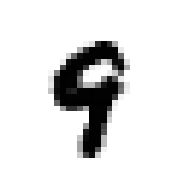

In [10]:
x.show()
print(y,x.shape)

In [11]:
tfms = ([*rand_pad(padding=3, size=28, mode='zeros')], [])
ll = ll.transform(tfms)

bs = 128

In [14]:
data = ll.databunch(bs=bs).normalize()

## Sample Model

In [15]:
def conv(ni,nf): return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)

model = nn.Sequential(
    conv(1, 8), # 14
    nn.BatchNorm2d(8),
    nn.ReLU(),
    conv(8, 16), # 7
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 32), # 4
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32, 16), # 2
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 10), # 1
    nn.BatchNorm2d(10),
    Flatten()     # remove (1,1) grid
)

This part is the usual torchember practice, for recoding input/output tensors

In [17]:
te=torchEmber(model) # ======== torchember arming the model forward function ========

start analyzing model


## Use torchember with fastai learner

In [18]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), 
                metrics=accuracy, )

In [19]:
learn.fit_one_cycle(1,callbacks=[EmberCallback(learn,te)]) # ======== torchember callback here ========

epoch,train_loss,valid_loss,accuracy,time
0,0.312269,0.214494,0.969600,00:53


Notice we have no affiliation with fast.ai, thought we're inspired by the course immensely